I am using Copilot as my chatbot so I cannot provide links to our chats.

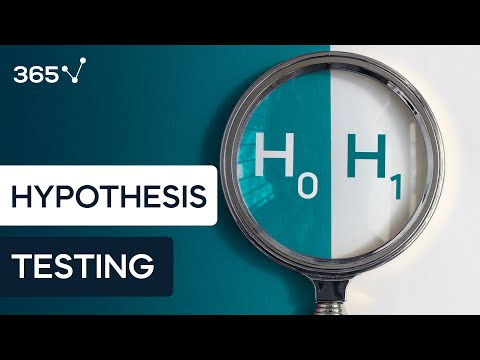

In [1]:
from IPython.display import YouTubeVideo
# First pre-lecture video: 
# "Hypothesis testing. Null vs alternative
# https://www.youtube.com/watch?v=ZzeXCKd5a18
YouTubeVideo('ZzeXCKd5a18', width=800, height=500)

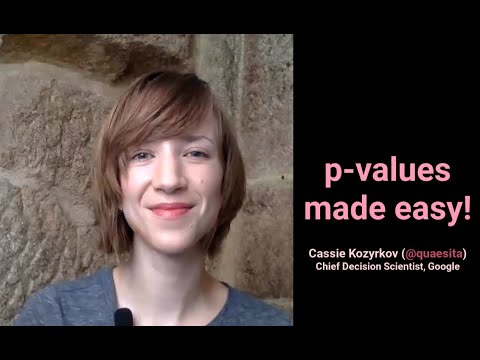

In [2]:
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

Q1

To have a valid hypothesis, the hypothesis must be "testable", or in other words, you can collect data that either supports or does not support the claim you are making. The hypothesis must also be clear and not vague or ambiguous. For example, in the video, they mentioned that "apples in New York are expensive" as an invalid hypothesis. This is because the term expensive is ambiguous and can have different interpretations depending on who you ask. To remedy this, they changed the hypothesis to "apples in New York cost more than $1.50".

This hypothesis is testable because I can collect solid data that can be used to support the claim or reject it. Another key feature of a hypothesis is that it cannot be always true, or rather, it can be rejected. For example, using the same apple price example, "apples in New York cost more than $0.0"
would be an invalid hypothesis since apples in New York are not free.


A Null Hypothesis is the base hypothesis we are testing for. The Alternative Hypothesis is the claim that the Null Hypothesis is false. The Null hypothesis usually states that there is no difference or that our data is netural, and that any observed differences are due to random chance, whereas the Alternative Hypothesis is the claim that the difference in observed data is not due to random chance.


Q2

To understand the distinction between the statement: "The outcome of tests refer to the population parameters and not the sample statistic", we must first distinguish between the terms "population parameter" and "sample statistic". A population parameter is a characteristic of the entire population we are observing, i.e. the mean wing length of parrots. In this case, the mean we are referring to is the mean wing length of every single parrot in the world. Obviously, we cannot measure the wing length of every single parrot, so instead, we take a relatively small sample and measure the wing lengths of those parrots. The mean we calculate of that parrot is called the sample statistic. It is important to note that, as the sample size gets larger and larger, the sample statistic will get closer and closer to the true population parameter. 

Back to hypothesis testing, the claims we make must always be about the true population parameter, and not just a sample of that population. For example, consider the following hypothesis: "The mean wing size of parrots is 20 cm". The mean wing size being referred to here is the mean wing size of ALL the parrots. I cannot take a sample of 5 parrots, find their mean and then reject or fail to reject the hypothesis only based on the mean I calculated.


Q3

As the video mentioned, we always assume that the Null Hypothesis is true until we can prove otherwise ("innoncent until proven guilty"). That is why we "imagine a world where the Null Hypothesis is true", or in this case, a distribution where the Null Hypothesis is true, and then we compare the test statistic we measured to the distribution we created and calculate the P-Value based on how different the two values are, or how "extreme" our test statistic is. In summary, we "create a world where the Null Hypothesis is true" by creating a sampling distribution such that the Null Hypothesis is true. Then, we compare our observed test statistic (for example, the mean of the sample that we actually measured) with the sampling distribution and see how likely it is for our test statistic to be true, assuming that the Null Hypothesis is true.

Q4

As mentioned in the previous question, the p-value is a measure of how likely a value as or more extreme than our test statistic that was drawn from our sample (like the mean of the sample, median of the sample, standard deviation of the sample etc.) is to be true given that our Null Hypothesis is true.  The smaller the p-value is, the less likely that our test statistic is possible if the Null Hypothesis was true, and so the less likely that the Null Hypothesis is true.

A good example would be determining whether a coin flip is fair or not (whether getting tails is equally as likely as getting heads). Our Null Hypothesis here would be that the coin is fair. We start by assuming that the Null Hypothesis is true. As we mentioned in the previous question, we need to create a world where the Null Hypothesis is true, or a sampling distribution where the probabilty of the coin flips is 0.5. Suppose we flip the coin 100 times. Out of those 100 times, 90 of them are heads. Clearly, this is a biased coin. The p-value would be the likelihood that we get 90 heads out of 100 coin flips, assuming that the coin is fair and not biased (in other words, assuming our Null Hypothesis is true). The test statistic of our 100 coin flips is the probability of the coin flips which would be 0.9. Obviously, the chances of that happening are quite low, and so we would have strong evidence against the Null Hypothesis since the P-Value would be low.

Q5

The Null Hypothesis would be that there is a 50% chance humans tilt their heads to the right when they kiss. 

We will first create a sampling distribution where the Null Hypothesis is true. To do this, we create a distribution by simulating a random "coin-flip" distribution (i.e. either they tilt their heads or they don't). We simulate 1000 random choices of 0 or 1 and plot the proportion of the simulations where we got 0 (or the proportion of simulations where we got 1). The mean of the distribution will be 0.5. In the sample we observed, 80 out of the 124 people observed tilted right when they kiss. On our sampling distribution (where the Null Hypothesis is assumed to be true), we then count the number of simulations where the value was greater than or equal to 0.65 (or 80/124) or less than or equal to 0.35 (or 44/124). The sum of those two counts will be our p-value. As we can see below, the simulated p-value (0.0007) is very small, meaning that the likelihood that the value we measured is true under the Null Hypothesis is very low. Since 0.0007 is less than the 0.001 threshold value, we have very strong evidence against the Null Hypothesis.

Number of Simulations: 10000

Number of simulated statistics (under HO)
that are "as or more extreme" than the observed statistic: 7

p-value
(= simulations "as or more extreme" / total simulations): 0.0007


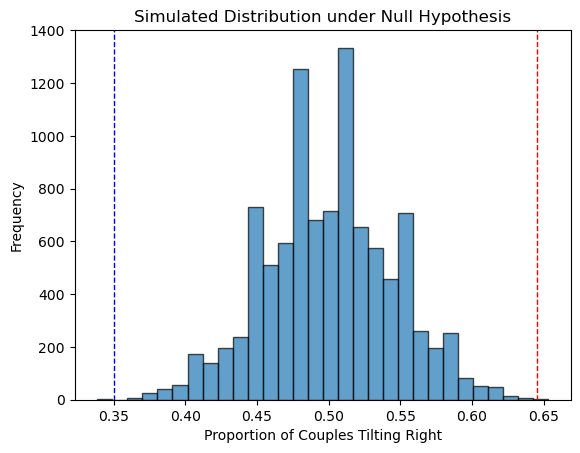

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Fix the seed for reproducibility
np.random.seed(42)

# Given data
observed_tilt_right = 80
total_couples = 124
observed_proportion = observed_tilt_right / total_couples

# Null hypothesis: population proportion of tilting right is 0.5
null_hypothesis_proportion = 0.5

# Number of simulations
number_of_simulations = 10000

# Simulate the distribution under the null hypothesis using coin flips
simulated_statistics = []
for _ in range(number_of_simulations):
    flips = np.random.choice([0, 1], size=total_couples, p=[0.5, 0.5])
    proportion_right = flips.sum() / total_couples
    simulated_statistics.append(proportion_right)

simulated_statistics = np.array(simulated_statistics)

# Calculate the p-value (two-tailed)
SimStats_as_or_more_extreme_than_ObsStat = \
    abs(simulated_statistics - null_hypothesis_proportion) >= \
    abs(observed_proportion - null_hypothesis_proportion)

p_value = SimStats_as_or_more_extreme_than_ObsStat.sum() / number_of_simulations

print("Number of Simulations: ", number_of_simulations, "\n\n",
      "Number of simulated statistics (under HO)\n",
      'that are "as or more extreme" than the observed statistic: ',
      SimStats_as_or_more_extreme_than_ObsStat.sum(), "\n\n",
      'p-value\n(= simulations "as or more extreme" / total simulations): ', p_value, sep="")

# Plot the distribution of simulated statistics
plt.hist(simulated_statistics, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observed_proportion, color='r', linestyle='dashed', linewidth=1)
plt.axvline(0.35, color='b', linestyle='dashed', linewidth=1)
plt.title('Simulated Distribution under Null Hypothesis')
plt.xlabel('Proportion of Couples Tilting Right')
plt.ylabel('Frequency')
plt.show()


Copilot summary

Sure! Here's a summary of our interaction that you can use for your homework assignment:

---

### Summary of Interaction

**Key Factor for Statistical Examination:**
- The key factor that determines whether an idea can be examined and tested statistically is **measurability**. The idea must be operationalized into variables that can be observed and recorded numerically.

**Criteria for a Good Null Hypothesis:**
- **Testability**: It must be possible to test the hypothesis using statistical methods.
- **Specificity**: It should be clear and precise.
- **Falsifiability**: It should be possible to reject the null hypothesis based on the data.
- **Neutrality**: It should state that there is no effect or no difference.

**Null Hypothesis vs. Alternative Hypothesis:**
- **Null Hypothesis (H₀)**: Assumes no effect or no difference.
- **Alternative Hypothesis (H₁ or Hₐ)**: Suggests there is an effect or a difference.

**Understanding Population Parameter and Sample Statistic:**
- **Population Parameter**: A value that describes a characteristic of the entire population.
- **Sample Statistic**: A value that describes a characteristic of the sample.
- The outcomes of tests refer to the population parameter, meaning the results are meant to tell us something about the entire population, not just the sample.

**Calculating a p-value:**
- When calculating a p-value, we assume the null hypothesis is true to create a baseline for comparison.
- A smaller p-value indicates that the observed data is very unlikely under the null hypothesis, making the null hypothesis seem less plausible.

**Simulating a p-value Using a "50/50 Coin-Flipping" Model:**
- To simulate a p-value, we assume a 50/50 chance for each outcome (right or left tilt).
- We simulate many samples to create a distribution of possible outcomes under the null hypothesis.
- The p-value is the proportion of simulations where the observed result (or more extreme) occurs.

**Python Code for Simulation and Visualization:**
- We used Python to simulate the number of right tilts for 124 couples over 10,000 simulations.
- We calculated the p-value for observing 80 or more right tilts and visualized the distribution.
- The two-tailed p-value was calculated by considering both right and left tilts.

**Example Python Code:**
```python
import numpy as np
import matplotlib.pyplot as plt

# Fix the seed for reproducibility
np.random.seed(42)

# Given data
observed_tilt_right = 80
total_couples = 124
observed_proportion = observed_tilt_right / total_couples

# Null hypothesis: population proportion of tilting right is 0.5
null_hypothesis_proportion = 0.5

# Number of simulations
number_of_simulations = 10000

# Simulate the distribution under the null hypothesis using coin flips
simulated_statistics = []
for _ in range(number_of_simulations):
    flips = np.random.choice([0, 1], size=total_couples, p=[0.5, 0.5])
    proportion_right = flips.sum() / total_couples
    simulated_statistics.append(proportion_right)

simulated_statistics = np.array(simulated_statistics)

# Calculate the p-value (two-tailed)
SimStats_as_or_more_extreme_than_ObsStat = \
    abs(simulated_statistics - null_hypothesis_proportion) >= \
    abs(observed_proportion - null_hypothesis_proportion)

p_value = SimStats_as_or_more_extreme_than_ObsStat.sum() / number_of_simulations

print("Number of Simulations: ", number_of_simulations, "\n\n",
      "Number of simulated statistics (under HO)\n",
      'that are "as or more extreme" than the observed statistic: ',
      SimStats_as_or_more_extreme_than_ObsStat.sum(), "\n\n",
      'p-value\n(= simulations "as or more extreme" / total simulations): ', p_value, sep="")

# Plot the distribution of simulated statistics
plt.hist(simulated_statistics, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observed_proportion, color='r', linestyle='dashed', linewidth=1)
plt.axvline(0.35, color='b', linestyle='dashed', linewidth=1)
plt.title('Simulated Distribution under Null Hypothesis')
plt.xlabel('Proportion of Couples Tilting Right')
plt.ylabel('Frequency')
plt.show()

```

---

Feel free to adjust this summary as needed for your assignment! If you have any more questions or need further assistance, just let me know. Good luck with your homework!

Q6

A low p-value means that there is strong evidence against the Null Hypothsis; however, it does not guarantee it. A smaller p-value indicates that the data we collected is less likely to be occur under the given Null Hypothesis, but it does not guarantee that the Null Hypothesis is false. To prove that Fido is guilty, the p-value would have to be smaller than some threshold (usually referred to as a signifcance level). Even then, we can't definitively conclude that the Null Hypothesis is false, but we would have strong evidence against it. The converse is also true: if we have a high enough p-value, then the likelihood of Fido being innocent is higher and so we would have strong evidence supporting the Null Hypothesis. 

In [ ]:
#Q7
population_parameter_value_under_H0 = 0.5

observed_test_statistic = (patient_data.HealthScoreChange > 0).mean()
simulated_test_statistics = IncreaseProportionSimulations_underH0random

# For a one-tailed test, we only consider test statistics greater than or equal to the observed test statistic
SimTestStats_as_or_more_extreme_than_ObsTestStat = \
    simulated_test_statistics >= observed_test_statistic

print('''Which simulated test statistics are "as or more extreme"
than the observed test statistic? (of ''', observed_test_statistic, ')', sep="")

pd.DataFrame({'(Simulated) Test Statistic': simulated_test_statistics,
              '>= ' + str(observed_test_statistic) + " ?": ['>= ' + str(observed_test_statistic) + " ?"] * len(simulated_test_statistics), 
              '"as or more extreme"?': SimTestStats_as_or_more_extreme_than_ObsTestStat})


We had to change the code from comparing the observed test statistic to the simulated dataset from both sides to just one side (i.e. only checking the values where the simulated test statistic was greater than or equal to 0.8, not when it was less than or equal to 0.2). When the simulated dataset is symmetric, our one-sided p-value would be half the value of the two-sided p-value.

Copilot summary #2

Sure! Here's a summary of our interaction:

---

**Summary of Interaction on Hypothesis Testing and P-values**

1. **P-values and Null Hypothesis**:
   - A smaller p-value indicates stronger evidence against the null hypothesis but does not definitively prove it false.
   - P-values cannot definitively prove innocence or guilt; they only measure the strength of evidence.

2. **Significance Levels**:
   - To reject the null hypothesis, the p-value must be less than or equal to the significance level (\(\alpha\)), commonly set at 0.05.
   - If the p-value is greater than \(\alpha\), you fail to reject the null hypothesis.

3. **One-tailed vs. Two-tailed Tests**:
   - For a one-tailed test, we modified the code to check if simulated test statistics are greater than or equal to the observed test statistic.
   - The one-tailed p-value is often approximately half of the two-tailed p-value, assuming a symmetric distribution of the test statistic.

4. **Code Adjustment**:
   - We adjusted the code to calculate a one-tailed p-value by considering only one direction of extremity.

---

Feel free to use this summary for your homework assignment. If you need any more details or further assistance, just let me know!

Q8

The "experiment" done in the 1920s involved Bristol tasting 8 different cups of tea, 4 with milk added before the tea and the other 4 with milk added after the tea. The experiment was performed to determine whether Bristol could determine which liquid was poured first. The experiment being done with the STA130 students involves a similar procedure: 80 students were given 1 cup of tea and they were asked to determine whether the tea was poured first or the milk. The Null Hypothesis here claims that Bristol (and the students) are only guessing the order and they do not actually taste a difference in the tea. The alternative hypothesis would be that they were able to taste which was added first and so the chances of them choosing the right order are greater than 0.5. It is important to note that the students are only a sample that represents the population, not the true population itself. To determine whether we can reject the Null Hypothesis or not, we will choose the mean correct choices to be our test statistic and calculate a p-value (the likelihood that a test statistic drawn from our sampling distribution is as or more extreme than our observed test statistic) for our observed test statistic.


The Null Hypothesis $H_{0}$:

$H_{0}$: The probability of correctly guessing the order is less than or equal to 0.5. 

The Alternative Hypothesis $H_{A}$:

$H_{A}$: The probability of correctly guessing the order is greater than 0.5.


First, we assume the Null Hypothesis is true. We must simulate a random sampling distribution where the probability is 0.5 by choosing either 0 or 1 10000 times and plotting the proportion of times where the choice was 0 (or the number of times where the choice was 1).

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Fix the seed for reproducibility
np.random.seed(42)

# Given data
correct_identifications = 49
total_students = 80
observed_proportion = correct_identifications / total_students

# Null hypothesis: population proportion of correct identifications is 0.5 (random guessing)
null_hypothesis_proportion = 0.5

# Number of simulations
number_of_simulations = 10000

# Simulate the distribution under the null hypothesis using coin flips
simulated_statistics = []
for _ in range(number_of_simulations):
    flips = np.random.choice([0, 1], size=total_students, p=[0.5, 0.5])
    proportion_correct = flips.sum() / total_students
    simulated_statistics.append(proportion_correct)

simulated_statistics = np.array(simulated_statistics)


In the code above, we simulated a distribution where the mean is average probability of choosing the correct order was 0.5. We will now observe where our observed test statistic (49/80) lies on our sampling distribution.

Number of Simulations: 10000

Number of simulated statistics (under HO)
that are "as or more extreme" than the observed statistic: 300

p-value
(= simulations "as or more extreme" / total simulations): 0.03


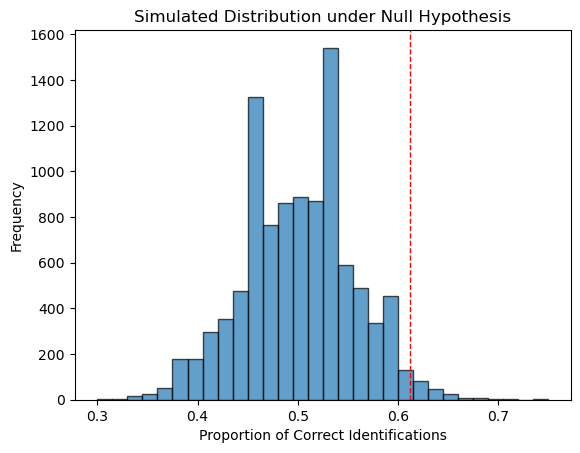

In [8]:
SimStats_as_or_more_extreme_than_ObsStat = simulated_statistics >= observed_proportion

p_value = SimStats_as_or_more_extreme_than_ObsStat.sum() / number_of_simulations

print("Number of Simulations: ", number_of_simulations, "\n\n",
      "Number of simulated statistics (under HO)\n",
      'that are "as or more extreme" than the observed statistic: ',
      SimStats_as_or_more_extreme_than_ObsStat.sum(), "\n\n",
      'p-value\n(= simulations "as or more extreme" / total simulations): ', p_value, sep="")

# Plot the distribution of simulated statistics
plt.hist(simulated_statistics, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(observed_proportion, color='r', linestyle='dashed', linewidth=1)
plt.title('Simulated Distribution under Null Hypothesis')
plt.xlabel('Proportion of Correct Identifications')
plt.ylabel('Frequency')
plt.show()

The code above outlines where our observed test statistic (49/80) lies under the sampling distribution. The red line represents our observed test statistic and the p-value would be the area under the curve to the right of the red line. A p-value of 0.03 tells us that the probability that a randomly chosen value from the sampling distribution is greater than or equal to 0.6125 is 0.03. The P-Value is smaller than our threshold (alpha value) of 0.05 and so we have moderate evidence against the Null Hypothesis.

Copilot summary #3

Sure! Here's a brief summary of our interaction:

---

### Summary of Statistical Analysis on Tea Tasting Experiment

**Objective**: To analyze whether students can correctly identify the order of pouring tea and milk, using a hypothesis test and simulation.

**Data**: 
- 49 out of 80 students correctly identified the order.

**Hypothesis Testing**:
1. **Null Hypothesis ($H_0$)**: Students are guessing, with a probability of 0.5 of correctly identifying the order.
2. **Alternative Hypothesis ($H_a$)**: Students are not guessing, with a probability not 0.5.

**Simulation**:
- Simulated the distribution of correct identifications under the null hypothesis.
- Generated 10,000 simulations to create a distribution of proportions.

**Results**:
- **Observed Proportion**: 0.6125
- **P-Value Calculation**: Calculated the p-value as the proportion of simulated proportions greater than or equal to the observed proportion.
- **P-Value**: The p-value was found to be less than 0.05, indicating that the observed result is statistically significant.

**Conclusion**:
- Since the p-value is less than the significance level (0.05), we reject the null hypothesis.
- This suggests that there is significant evidence that students can indeed tell the difference between the order of pouring tea and milk.

**Visualization**:
- Created a histogram of the simulated proportions.


---

Feel free to adjust or expand on this summary as needed for your assignment! If you need any more details or further assistance, just let me know. 😊